## 주요 패키지 로딩

In [1]:
# 주요 라이브러리 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 


In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

mpl.rc('axes', unicode_minus=False)
mpl.rcParams['font.family'] = 'batang'

sns.set_style('dark') # 노트
sns.set(color_codes=True)
plt.rc('figure', figsize=(10,8))
# sns.set(font='batang', rc={'axes.unicode_minus':False}, style='darkgrid')
warnings.filterwarnings('ignore')

## 2018년도 국내 프로야구 선수 연봉 예측
- 출처 : http://www.statiz.co.kr/stat.php?lr=5|

### datasets loading

In [43]:
# 데이터 로딩
batter = pd.read_csv('C:/k_digital/Sourcce/data/batter_stats_2017.csv')
picher = pd.read_csv('C:/k_digital/Sourcce/data/picher_stats_2017.csv')

### EDA(탐색적 데이터 분석)
#### 데이터 기본 정보 분석

In [4]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

In [6]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [7]:
picher.shape

(152, 22)

- 2018년도 연봉(10000원 단위)이 타겟
- 피쳐간의 수치 차이가 큰걸보니 정규화 시키는것도 필요하겠군

In [8]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

In [11]:
mpl.rcParams['font.family'] = 'batang'

<AxesSubplot:>

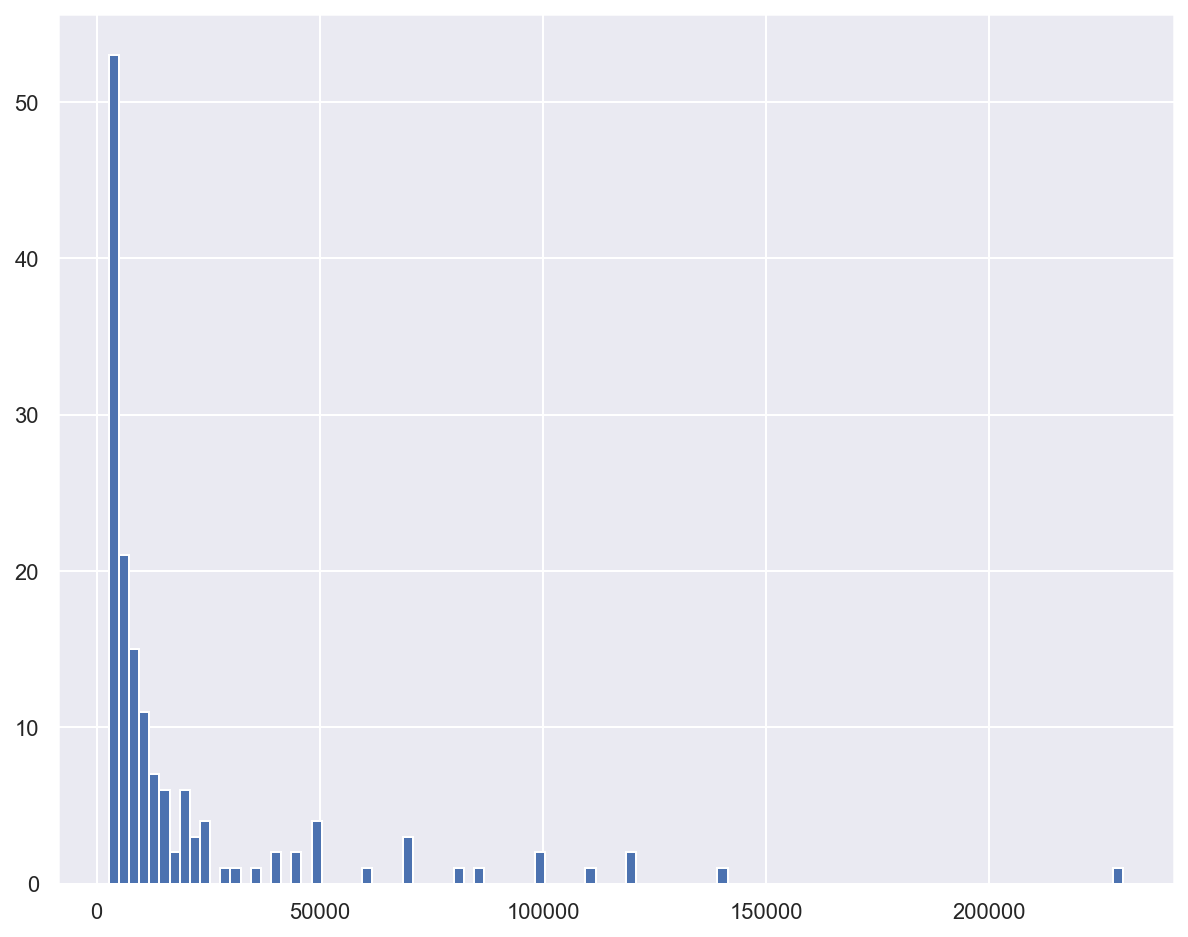

In [9]:
# 시각화로 분포 확인
picher['연봉(2018)'].hist(bins=100)

<AxesSubplot:>

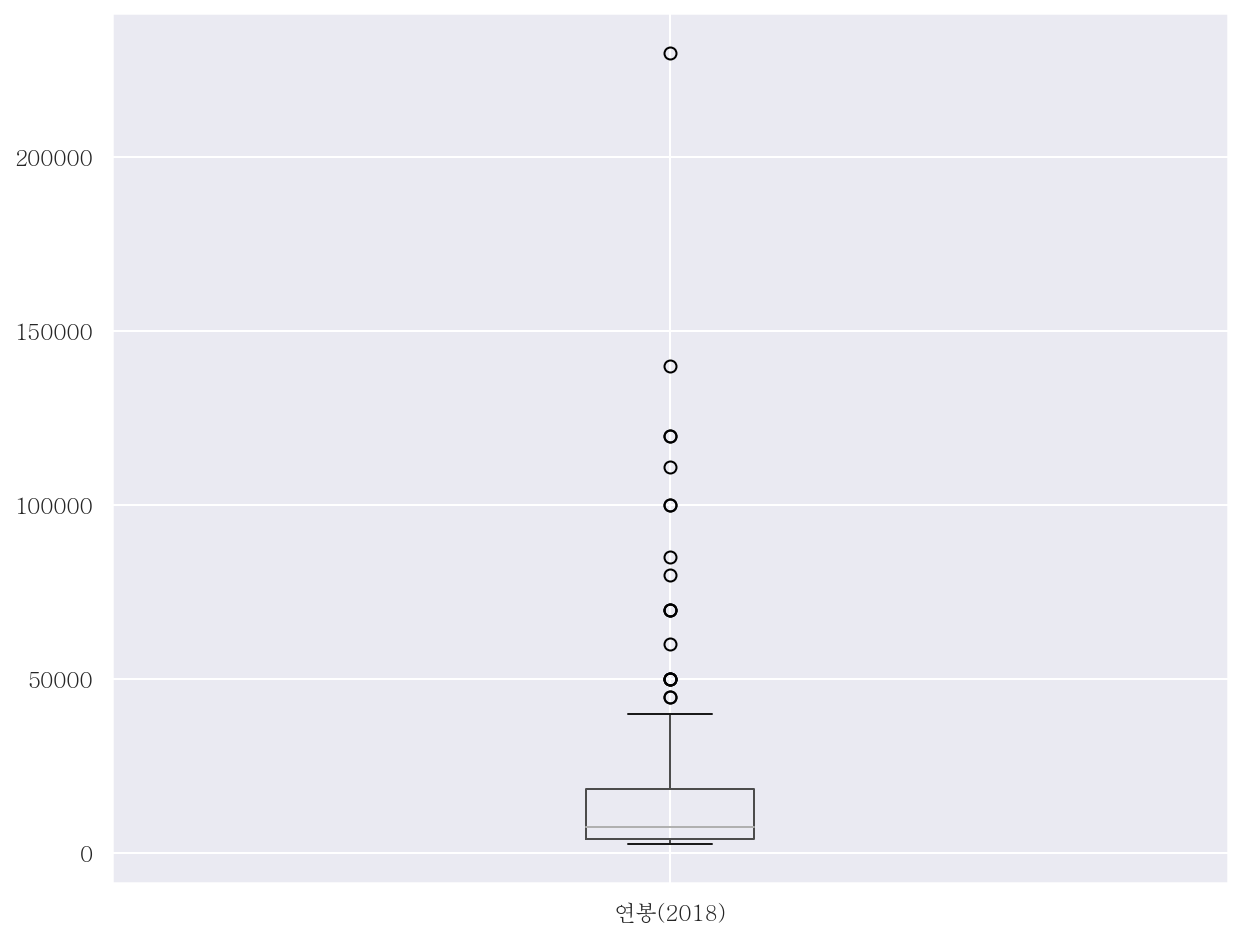

In [12]:
# 이상치 확인
picher.boxplot(column = ['연봉(2018)'])

### 회귀 분석에 사용할 피쳐탐색

In [13]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [44]:
picher_df = picher.drop(['선수명', '팀명'], axis=1)
picher_df.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [17]:
b = picher[picher.columns.difference(['선수명', '팀명'])]
b.head()
# 요렇게 하면 인덱스가 랜덤으로 배치되서 순서가 바뀌나봐 집합은 순서가 없으니깐

,BABIP,ERA,FIP,LOB%,RA9-WAR,WAR,kFIP,경기,볼넷/9,블론,삼진/9,선발,세,승,연봉(2017),연봉(2018),이닝,패,홀드,홈런/9
0,0.342,3.60,3.69,73.7,6.91,6.62,3.44,30,2.13,0,8.95,30,0,16,85000,140000,190.0,7,0,0.76
1,0.319,3.88,3.52,67.1,6.80,6.08,3.41,30,1.85,0,7.43,29,1,11,50000,120000,185.1,11,0,0.53
2,0.332,3.44,3.94,72.1,6.54,5.64,3.82,31,2.09,0,7.36,31,0,20,150000,230000,193.1,6,0,0.79
3,0.298,3.43,4.20,75.0,6.11,4.63,4.03,28,1.95,0,8.04,28,0,10,100000,100000,175.2,7,0,1.02
4,0.323,3.80,4.36,74.1,6.13,4.38,4.31,30,2.11,0,7.49,30,0,13,85000,111000,187.1,7,0,0.91


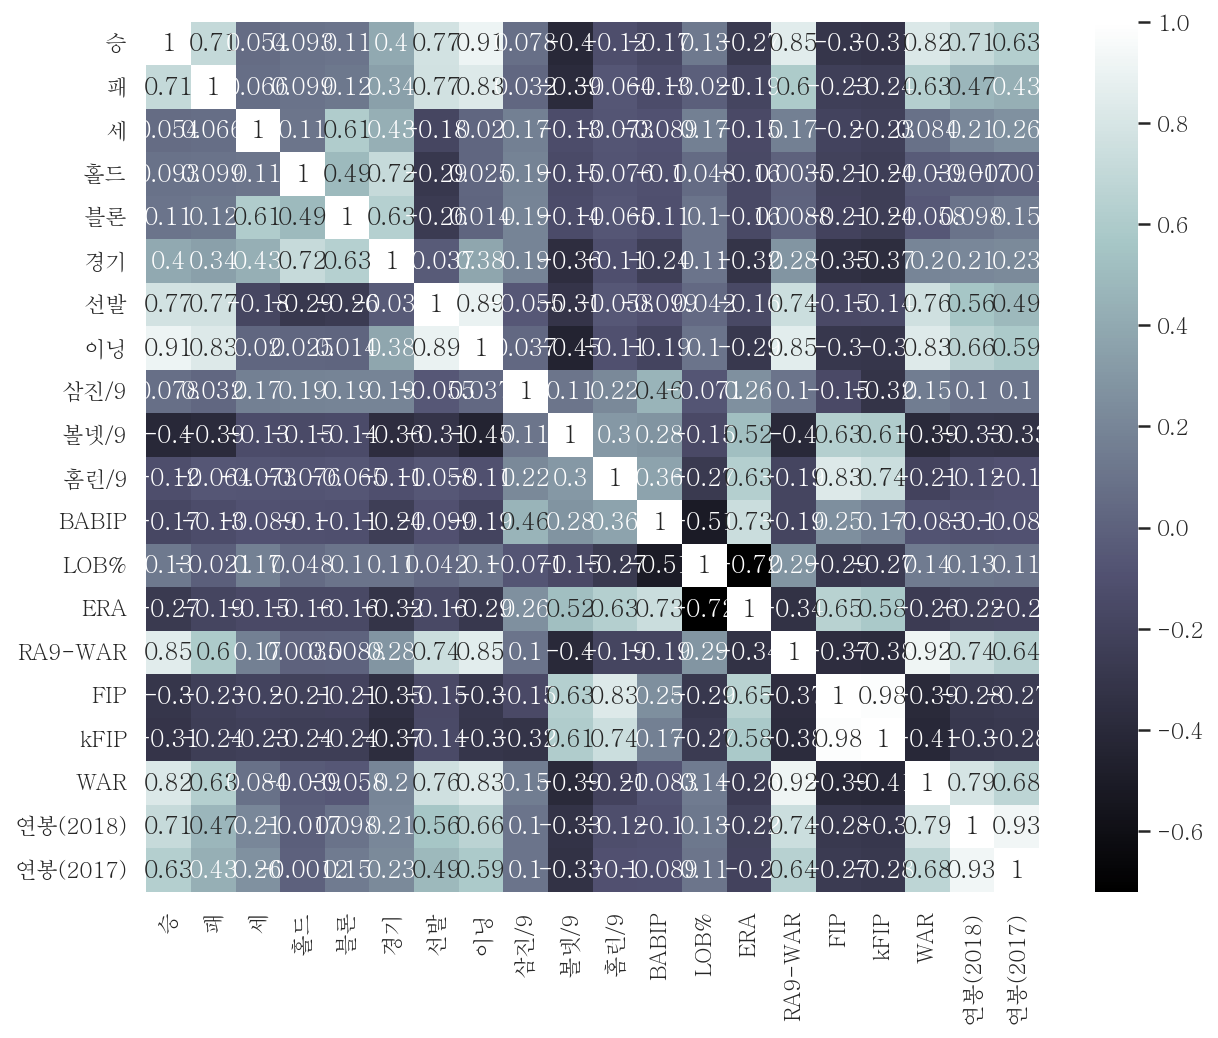

In [21]:
# 상관관계 알아보기
sns.heatmap(picher_df.corr(),vmax=1, annot=True, cmap=plt.cm.bone)
plt.rc('figure', figsize=(25,25))
plt.show()

In [45]:
# 각 feature에 대한 분포를 시각화 하는 작업
def plot_hist(df):
    plt.rcParams['figure.figsize'] = [20,16]
    fig = plt.figure(1) # 도화지 기본 속성
    # 반복으로 그리기
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5, i+1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
        
    plt.show()

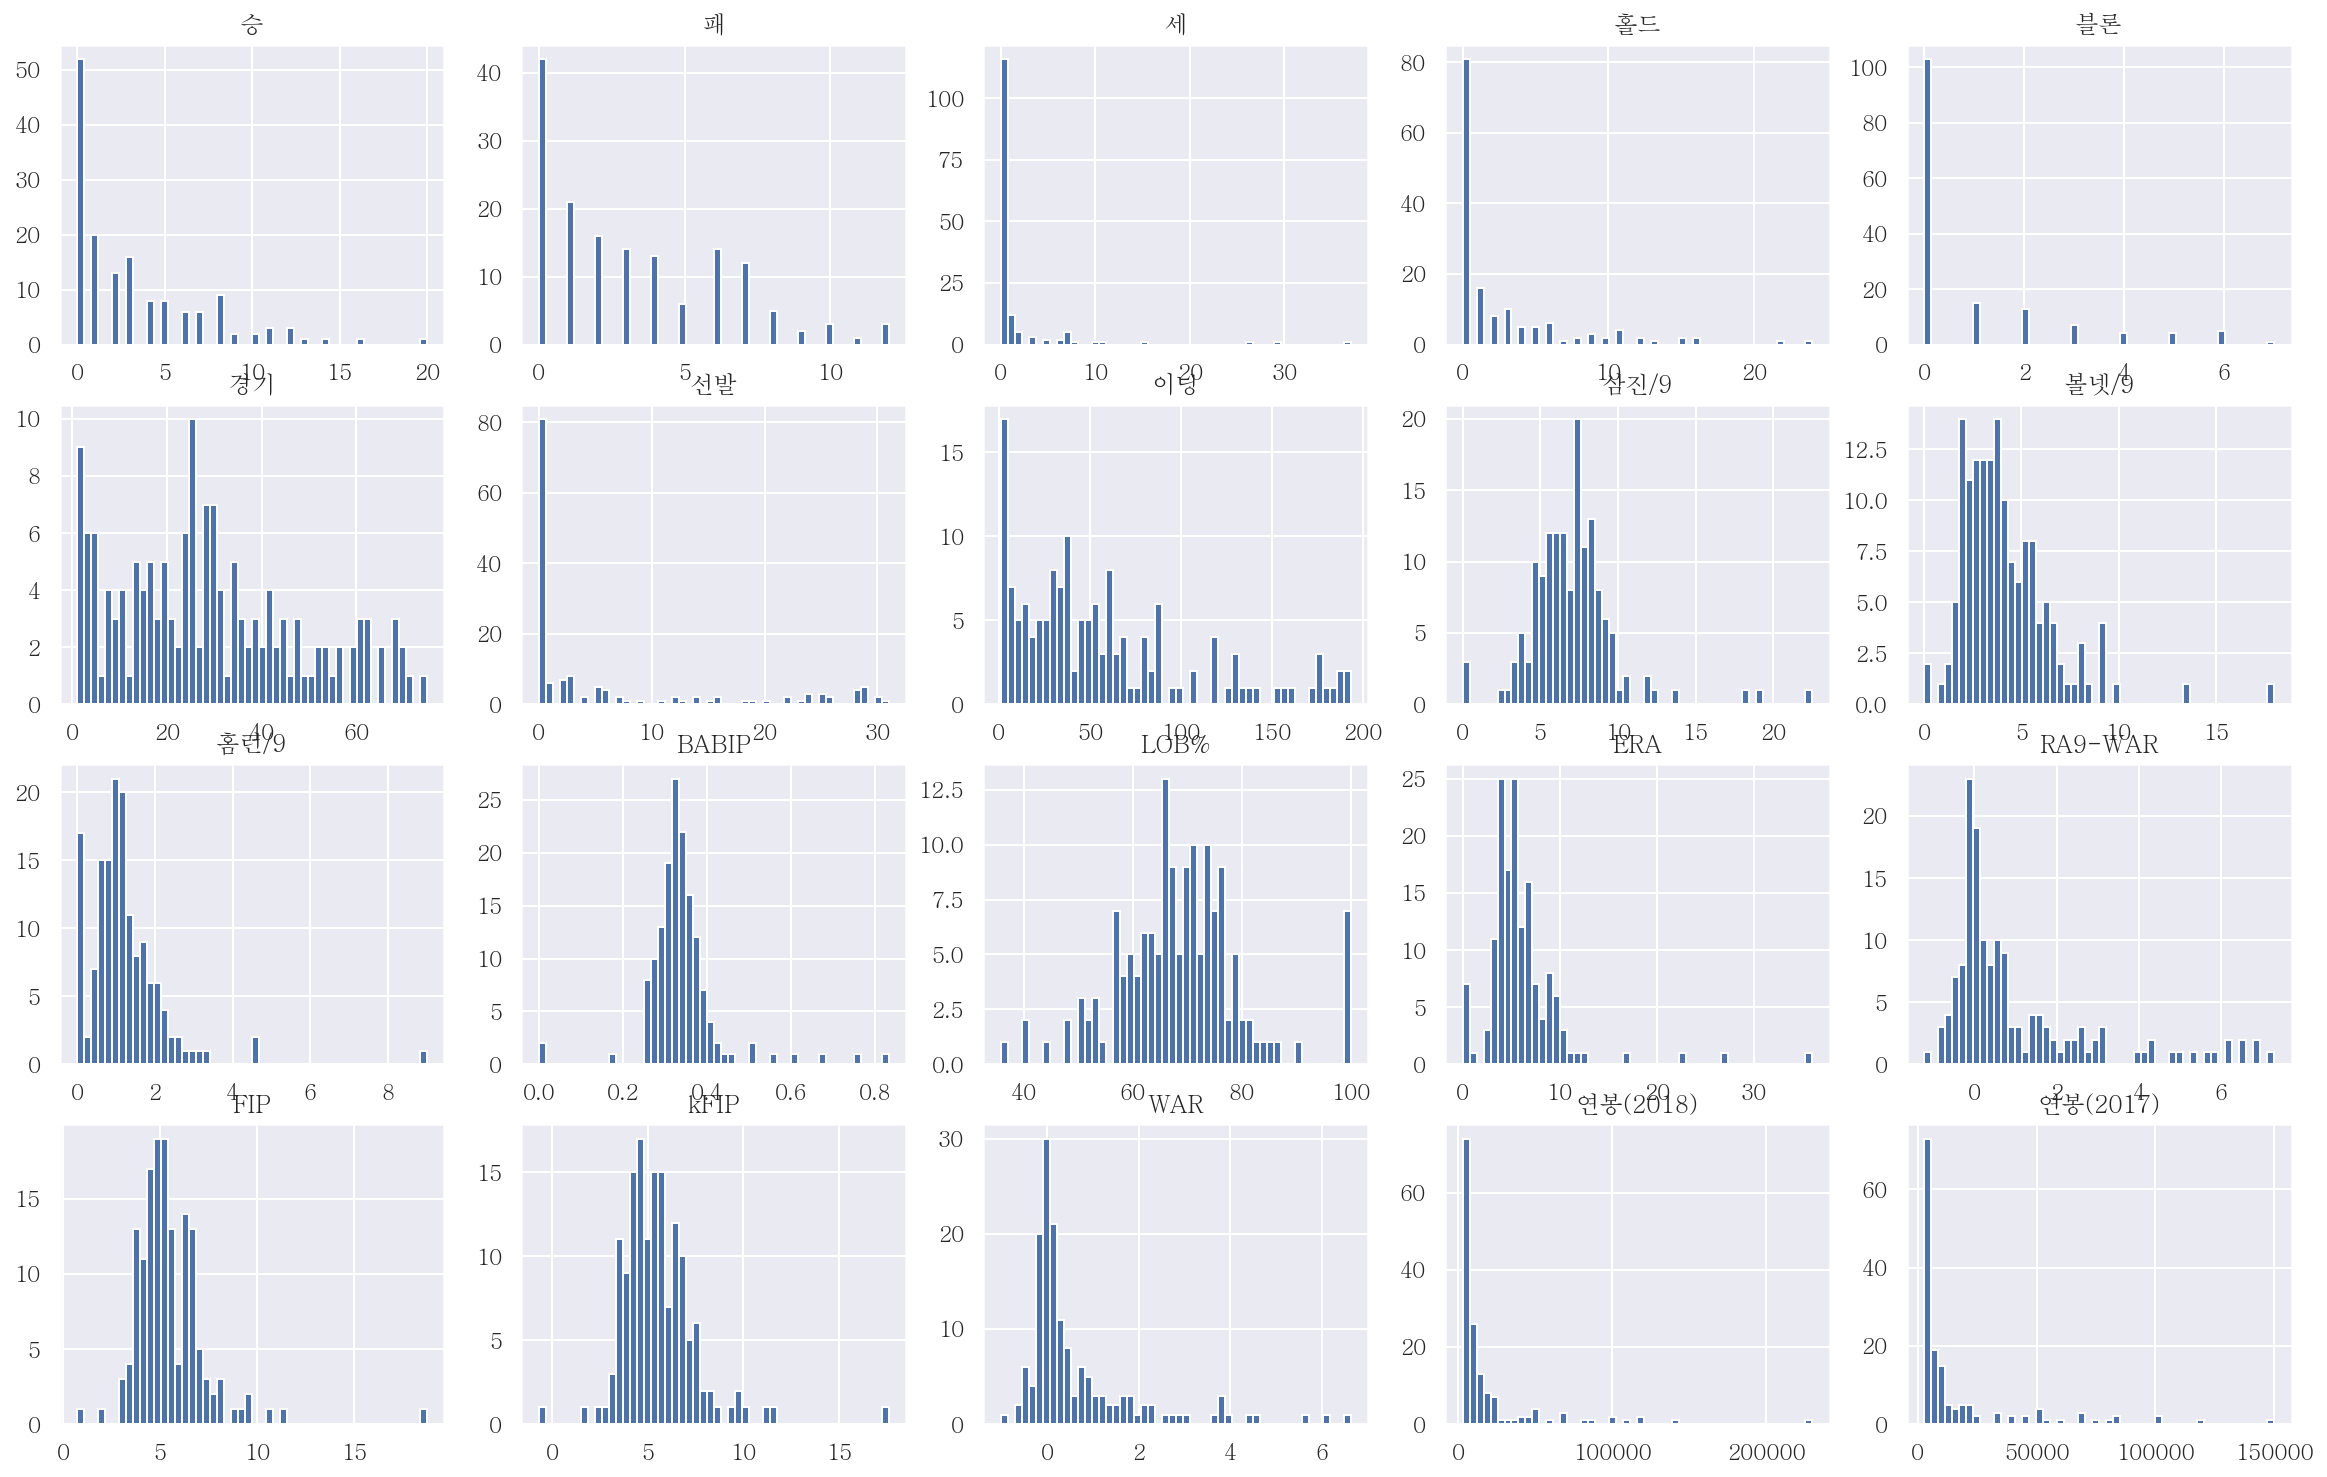

In [46]:
plot_hist(picher_df)

In [35]:
# 각 feature에 대한 분포를 시각화 하는 작업
colors=['y','b','k','r','g','m','c','orange','hotpink','dodgerblue',
       'y','b','k','r','g','m','c','orange','hotpink','dodgerblue']
def plot_histc(df):
    plt.rcParams['figure.figsize'] = [20,16]
    fig = plt.figure(1) # 도화지 기본 속성
    # 반복으로 그리기
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5, i+1)
        plt.hist(df[df.columns[i]], bins = 50, color=colors[i])
        ax.set_title(df.columns[i])
        
    plt.show()

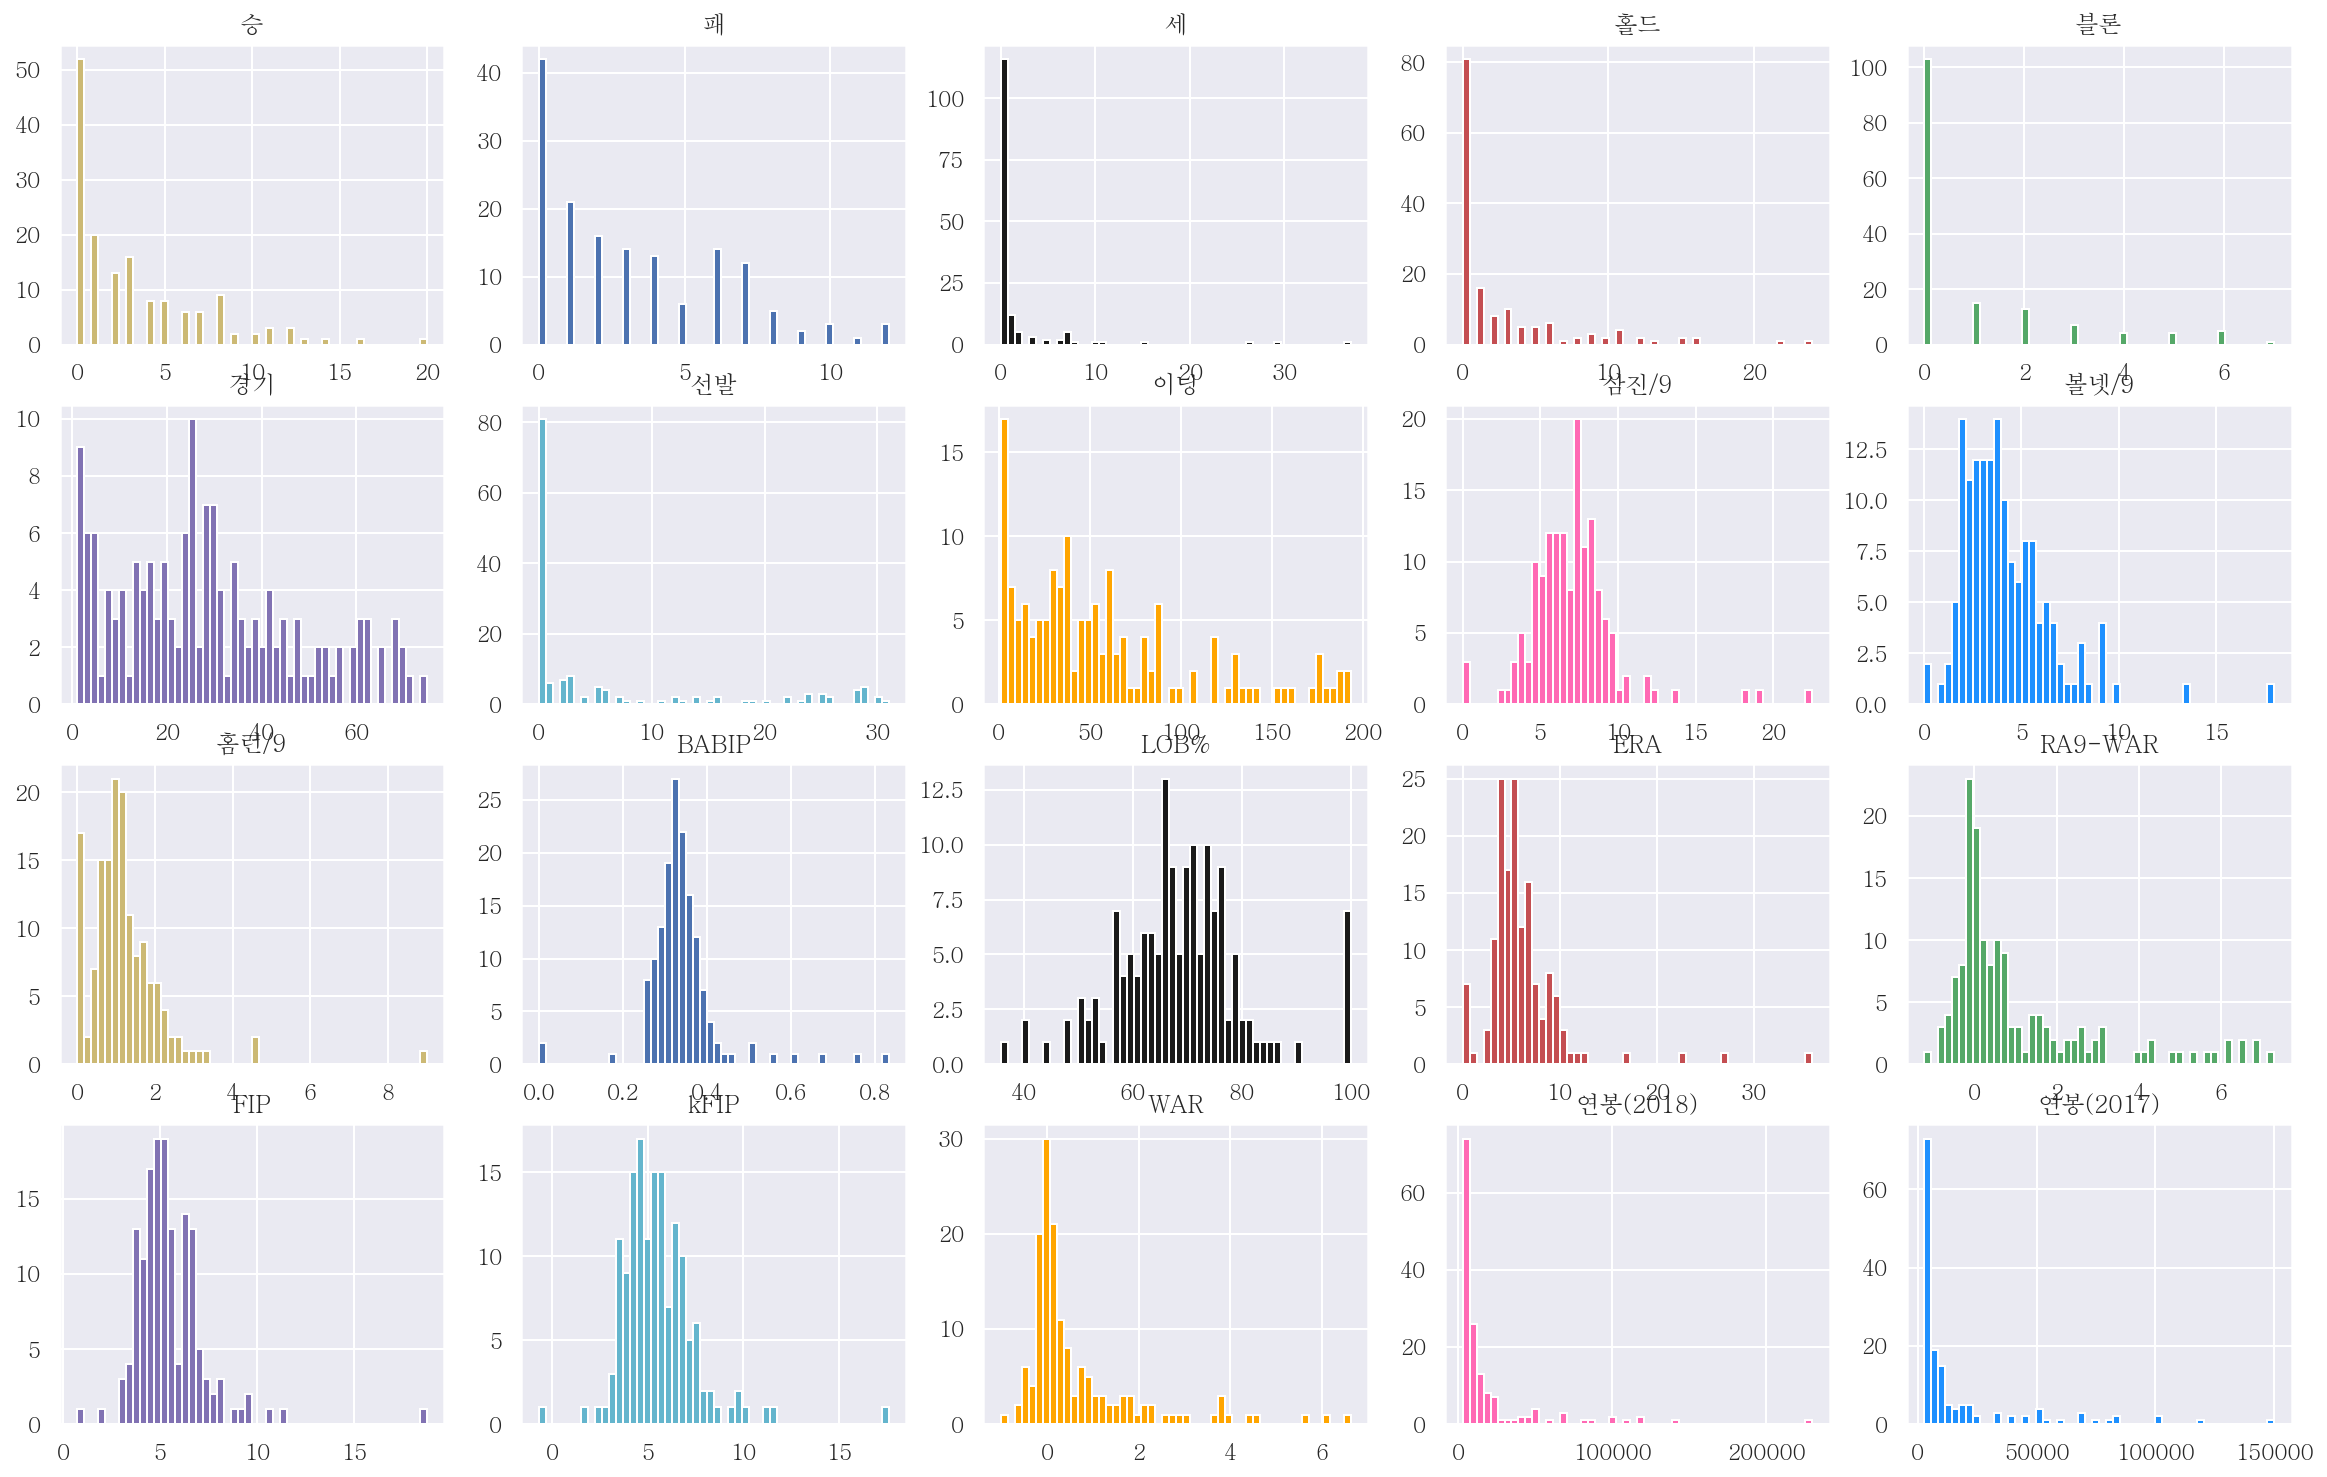

In [36]:
plot_histc(picher_df)

### 전처리 : 피처 스케일링
- 피처스케일링 : 피처들 간의 단위를 맞추는 작업
- StandardScaler : 표준화(평균=0, 표준편차=1)
 - 즉, 모든 값을 0~1사이의 값으로 단위를 맞추는 작업

In [ ]:
from sklearn.preprocessing import StandardScaler

In [47]:
# 표준화를 위한 함수 정의
def standard_scalling(df, scale_columns):
    
    for col in scale_columns:
        df_mean = df[col].mean()
        df_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x-df_mean)/df_std)
        
    return df

In [48]:
# 회귀분석 : 독립변수와 종속변수를 분리하는 작업
# 종속분석 : 연봉(2018)
# 독립분석를 사용할 feature들을 리스트로 저장
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']

picher_df = standard_scalling(picher, scale_columns)

In [49]:
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


#### 피처스케일링 : 더미 or one-hot 인코딩
- 문자 또는 범주형 데이터를 정형화된 데이터(0, 1)로 변형하는 작업

In [51]:
team_encoding = pd.get_dummies(picher_df['팀명'])
# 기존의 팀명 컬러 삭제
picher_df=picher_df.drop('팀명',axis=1)
picher_df = picher_df.join(team_encoding)

In [52]:
team_encoding.head()

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [53]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [54]:
# 성능 평가 함수 정의
from sklearn.metrics import mean_squared_error, mean_absolute_error
## MAE, RMSE
def evaluate_rger(y,pred):
    # MAE
    mae = mean_absolute_error(y,pred)
    #RMSE
    rmse = np.sqrt(mean_squared_error(y,pred))
    print(f'MAE: {mae:.3f}, RMSE: {rmse:.3f}')
    

### 선형회귀
<br>

#### 기본 예측/평가

In [56]:
from sklearn.model_selection import train_test_split # 셋 분리
from sklearn.linear_model import LinearRegression # 선형회귀
# 문제와 답
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]  # 인덱스만 불러온 값을 X에담음
y = picher_df['y']
# 셋분리
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=109)
# 선형
lr = LinearRegression() # estimator
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
# 평가함수 호출
evaluate_rger(y_test, pred)

MAE: 5149.459, RMSE: 8796.143


### 예측값, 실제값 데이터 분석

In [70]:
def get_top_error_data(y_test, pred, n_tops=5):
    # 예측값, 실제값 데이터 프레임 생성
    result_df = pd.DataFrame(y_test.values, columns=['real_y'])
    result_df['pred_y'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_y'] - result_df['pred_y'])
    
    # 예측값과 실제 값의 차이가 큰 데이터 순서대로 추출
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops=10)

    real_y   pred_y     diff
4   120000  78990.0  41010.0
26   23000  35361.0  12361.0
18   15500  24359.0   8859.0
2    45000  37538.0   7462.0
29   18800  25924.0   7124.0
30   70000  62926.0   7074.0
28    5200  -1867.0   7067.0
11   50000  56559.0   6559.0
21   45000  38449.0   6551.0
9     6000    211.0   5789.0


In [57]:
import statsmodels.api as sm

# 상수항
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit() # 형식이 기존의 것과 다름
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     45.46
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           2.32e-42
Time:                        10:42:31   Log-Likelihood:                -1266.9
No. Observations:                 121   AIC:                             2590.
Df Residuals:                      93   BIC:                             2668.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.669e+04    820.257     20.344      0.000    1.51e+04    1.83e+04
BABIP      -1305.2012   1546.614     -0.844      0.401   -4376.471    1766.068
ERA         1075.2193   2969.925      0.362      0.718   -4822.463    6972.901
FIP        -2.196e+04   1.03e+05     -0.213      0.832   -2.27e+05    1.83e+05
KIA         3784.7236   2621.194      1.444      0.152   -1420.449    8989.896
KT          5661.9090   2782.287      2.035      0.045     136.839    1.12e+04
LG          -281.2007   2694.045     -0.104      0.917   -5631.040    5068.639
LOB%         827.8074   1972.455      0.420      0.676   -3089.098    4744.713
NC          2786.0709   3333.563      0.836      0.405   -3833.724    9405.866
RA9-WAR    -1477.9213   3166.677     -0.467      0.642   -7766.315    4810.472
SK          3344.6314   2436.481      1.373      0.173   -1493.737    8182.999
WAR         8659.5777   2779.678      3.115      0.002    3139.688    1.42e+04
kFIP         1.65e+04   8.76e+04      0.188      0.851   -1.58e+05    1.91e+05
경기         -3040.1896   3268.635     -0.930      0.355   -9531.051    3450.671
두산         -3392.4476   2884.609     -1.176      0.243   -9120.709    2335.814
롯데           901.1039   2866.956      0.314      0.754   -4792.103    6594.311
볼넷/9        3179.2847   6600.902      0.482      0.631   -9928.798    1.63e+04
블론            44.9215   1438.424      0.031      0.975   -2811.504    2901.347
삼성           180.8209   2691.922      0.067      0.947   -5164.802    5526.444
삼진/9         236.8134   8247.854      0.029      0.977   -1.61e+04    1.66e+04
선발         -5491.5441   5617.890     -0.978      0.331   -1.66e+04    5664.472
세           -284.3061   1742.359     -0.163      0.871   -3744.285    3175.673
승           6705.5101   2586.603      2.592      0.011    1569.030    1.18e+04
연봉(2017)    2.218e+04   1382.170     16.048      0.000    1.94e+04    2.49e+04
이닝          2900.2527   6925.986      0.419      0.676   -1.09e+04    1.67e+04
패          -1733.2717   2107.579     -0.822      0.413   -5918.505    2451.962
한화          3701.8629   2809.963      1.317      0.191   -1878.167    9281.893
홀드           475.1373   1678.595      0.283      0.778   -2858.220    3808.495
홈런/9        4980.3765   1.77e+04      0.281      0.780   -3.03e+04    4.02e+04
==============================================================================
Omnibus:                       36.098   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              611.449
Skew:                           0.158   Prob(JB):                    1.68e-133
Kurtosis:                      14.008   Cond. No.                     3.34e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

- 변수가 많으면 상관계수보다 설명계수를 많이 봄
- 어떤 피쳐의 영향력이 큰지 알아보기 위해 시각화를 함
<br><br>

### 시각화_피처들의 영향력 파악(summary의 params)

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

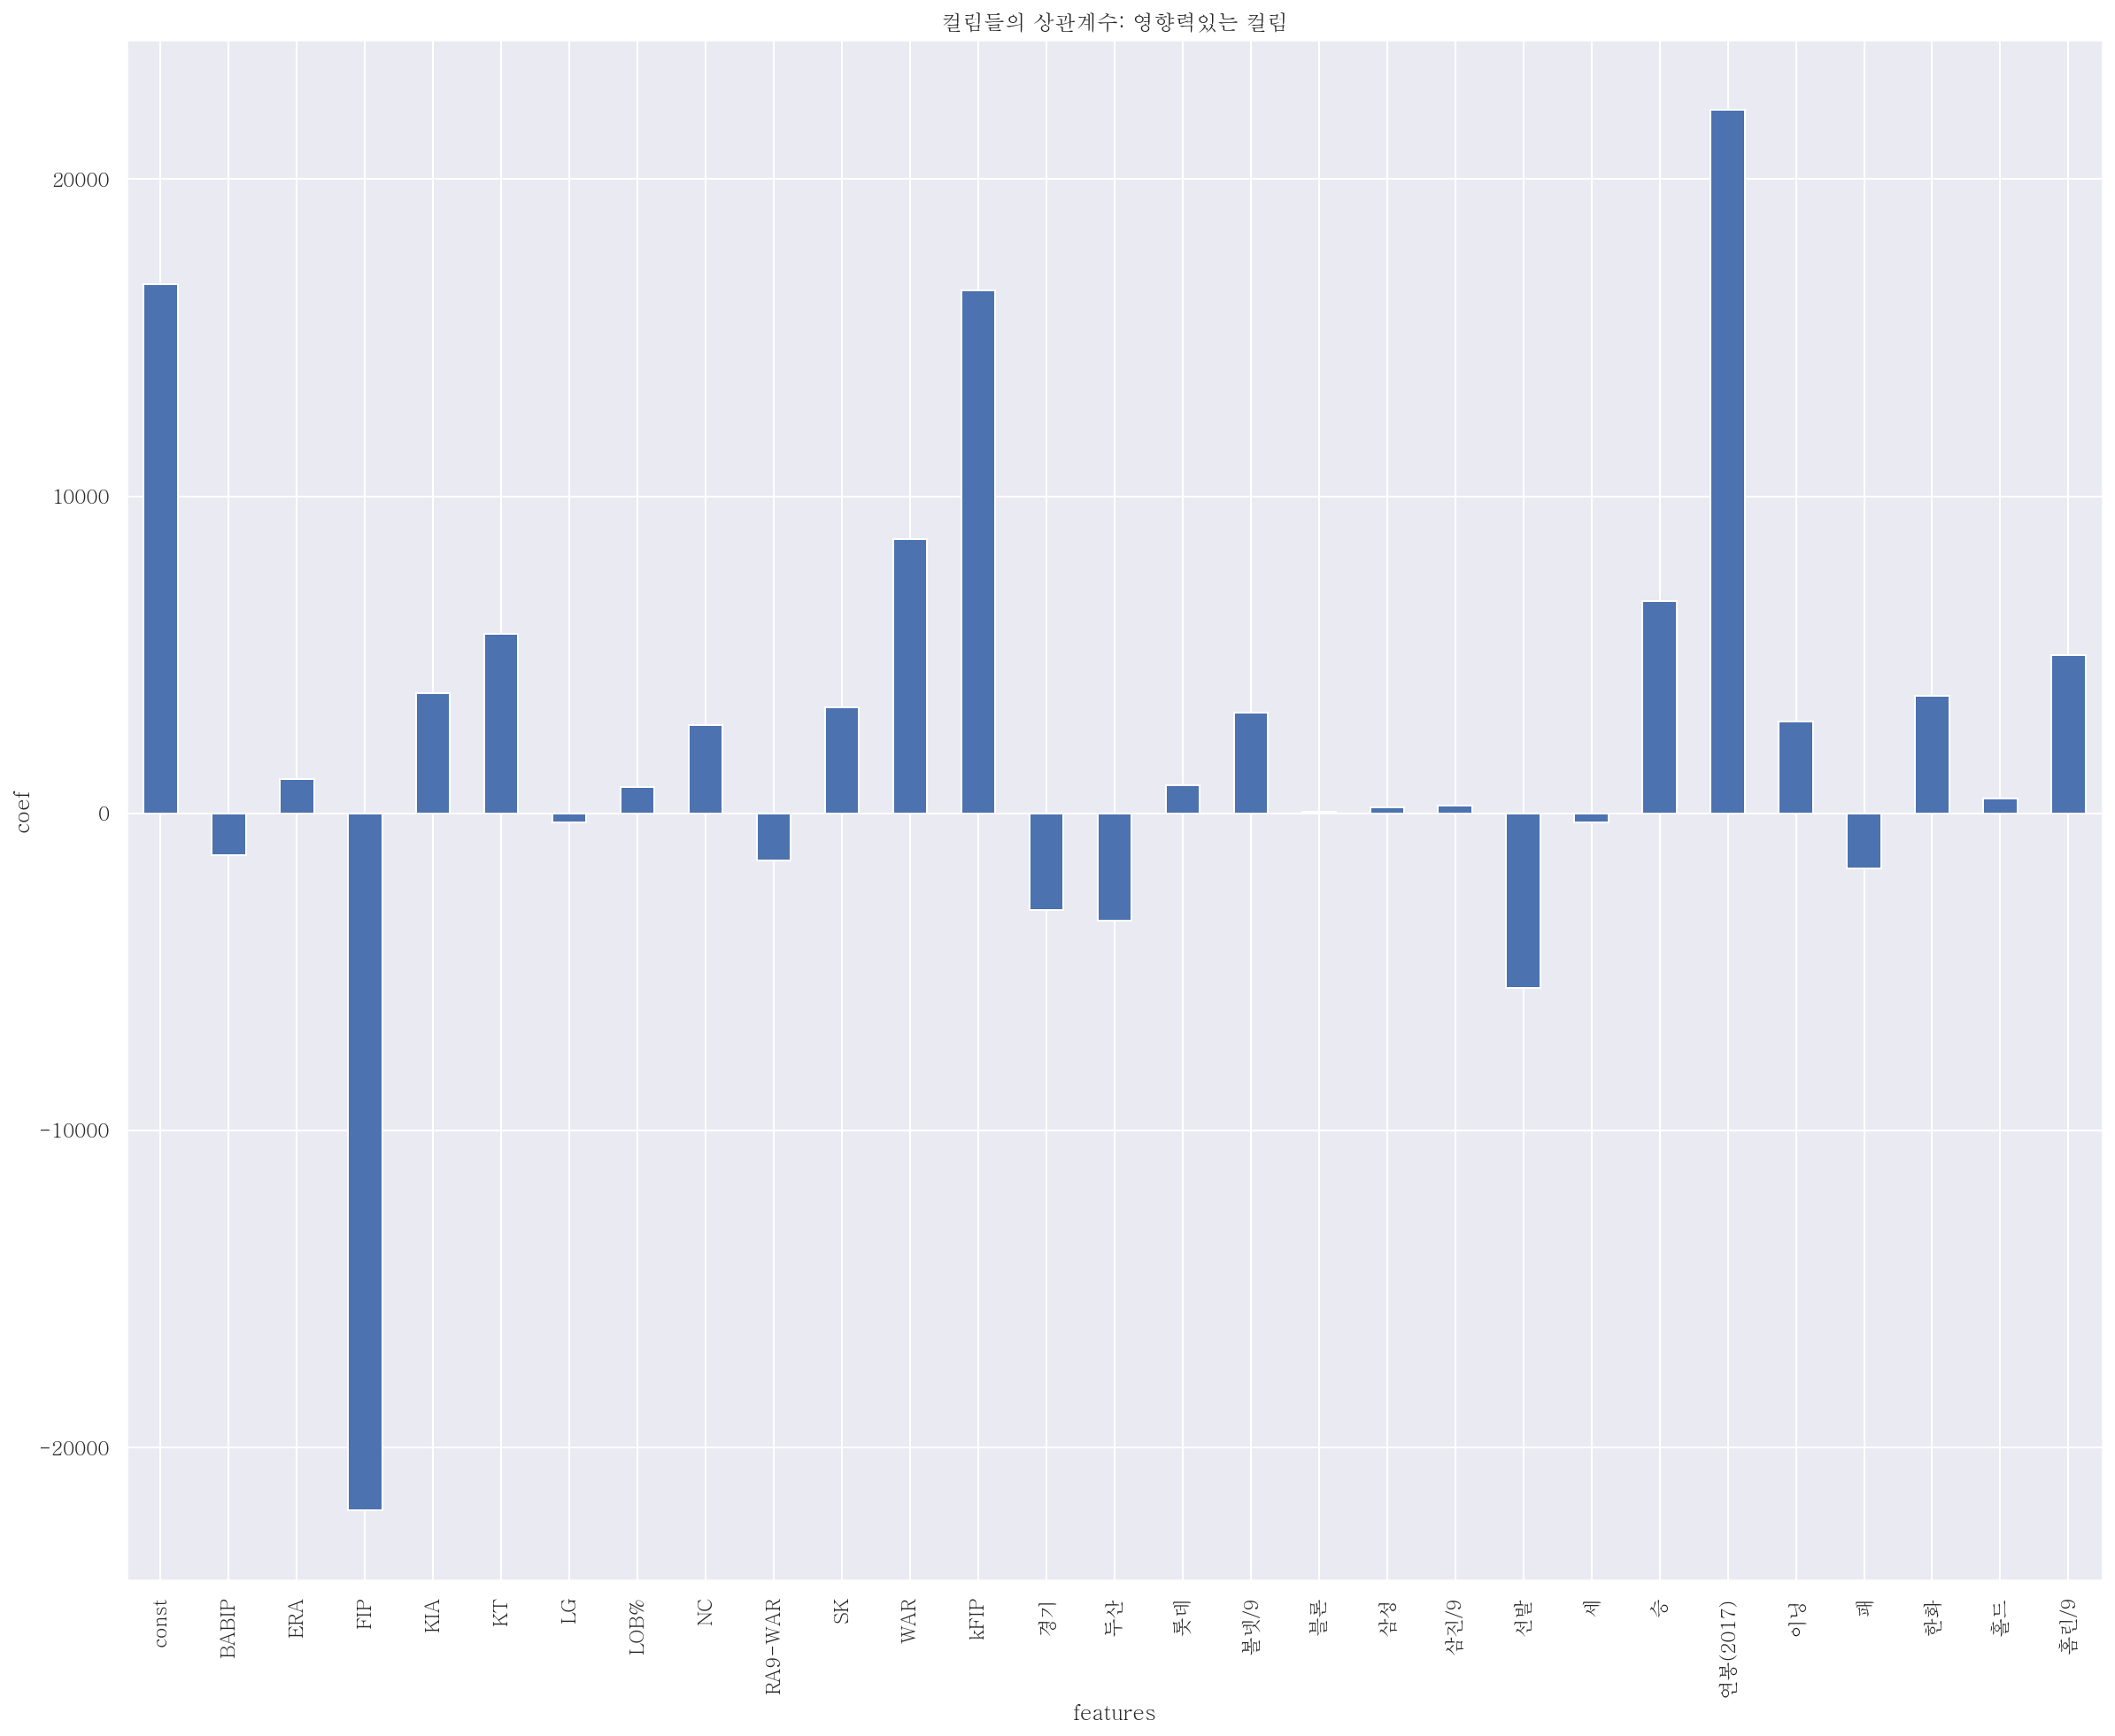

In [63]:
# 상관계수의 값을 가지고
## 회귀계수를 리스트로 변환
coefs = model.params.tolist()
coefs_sr = pd.Series(coefs)

## 변수명(index)를 리스트로 변환
x_label = model.params.index.tolist()

## 시각화
ax =coefs_sr.plot(kind='bar')
ax.set_title('컬럼들의 상관계수: 영향력있는 컬럼')
ax.set_xlabel('features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_label)


### 피처들의 상관관계를 분석화하는 시각화_heatmap
- 계수들간의 상관계수가 너무 크면 두 계수중 하나만 쓰는것이 좋음

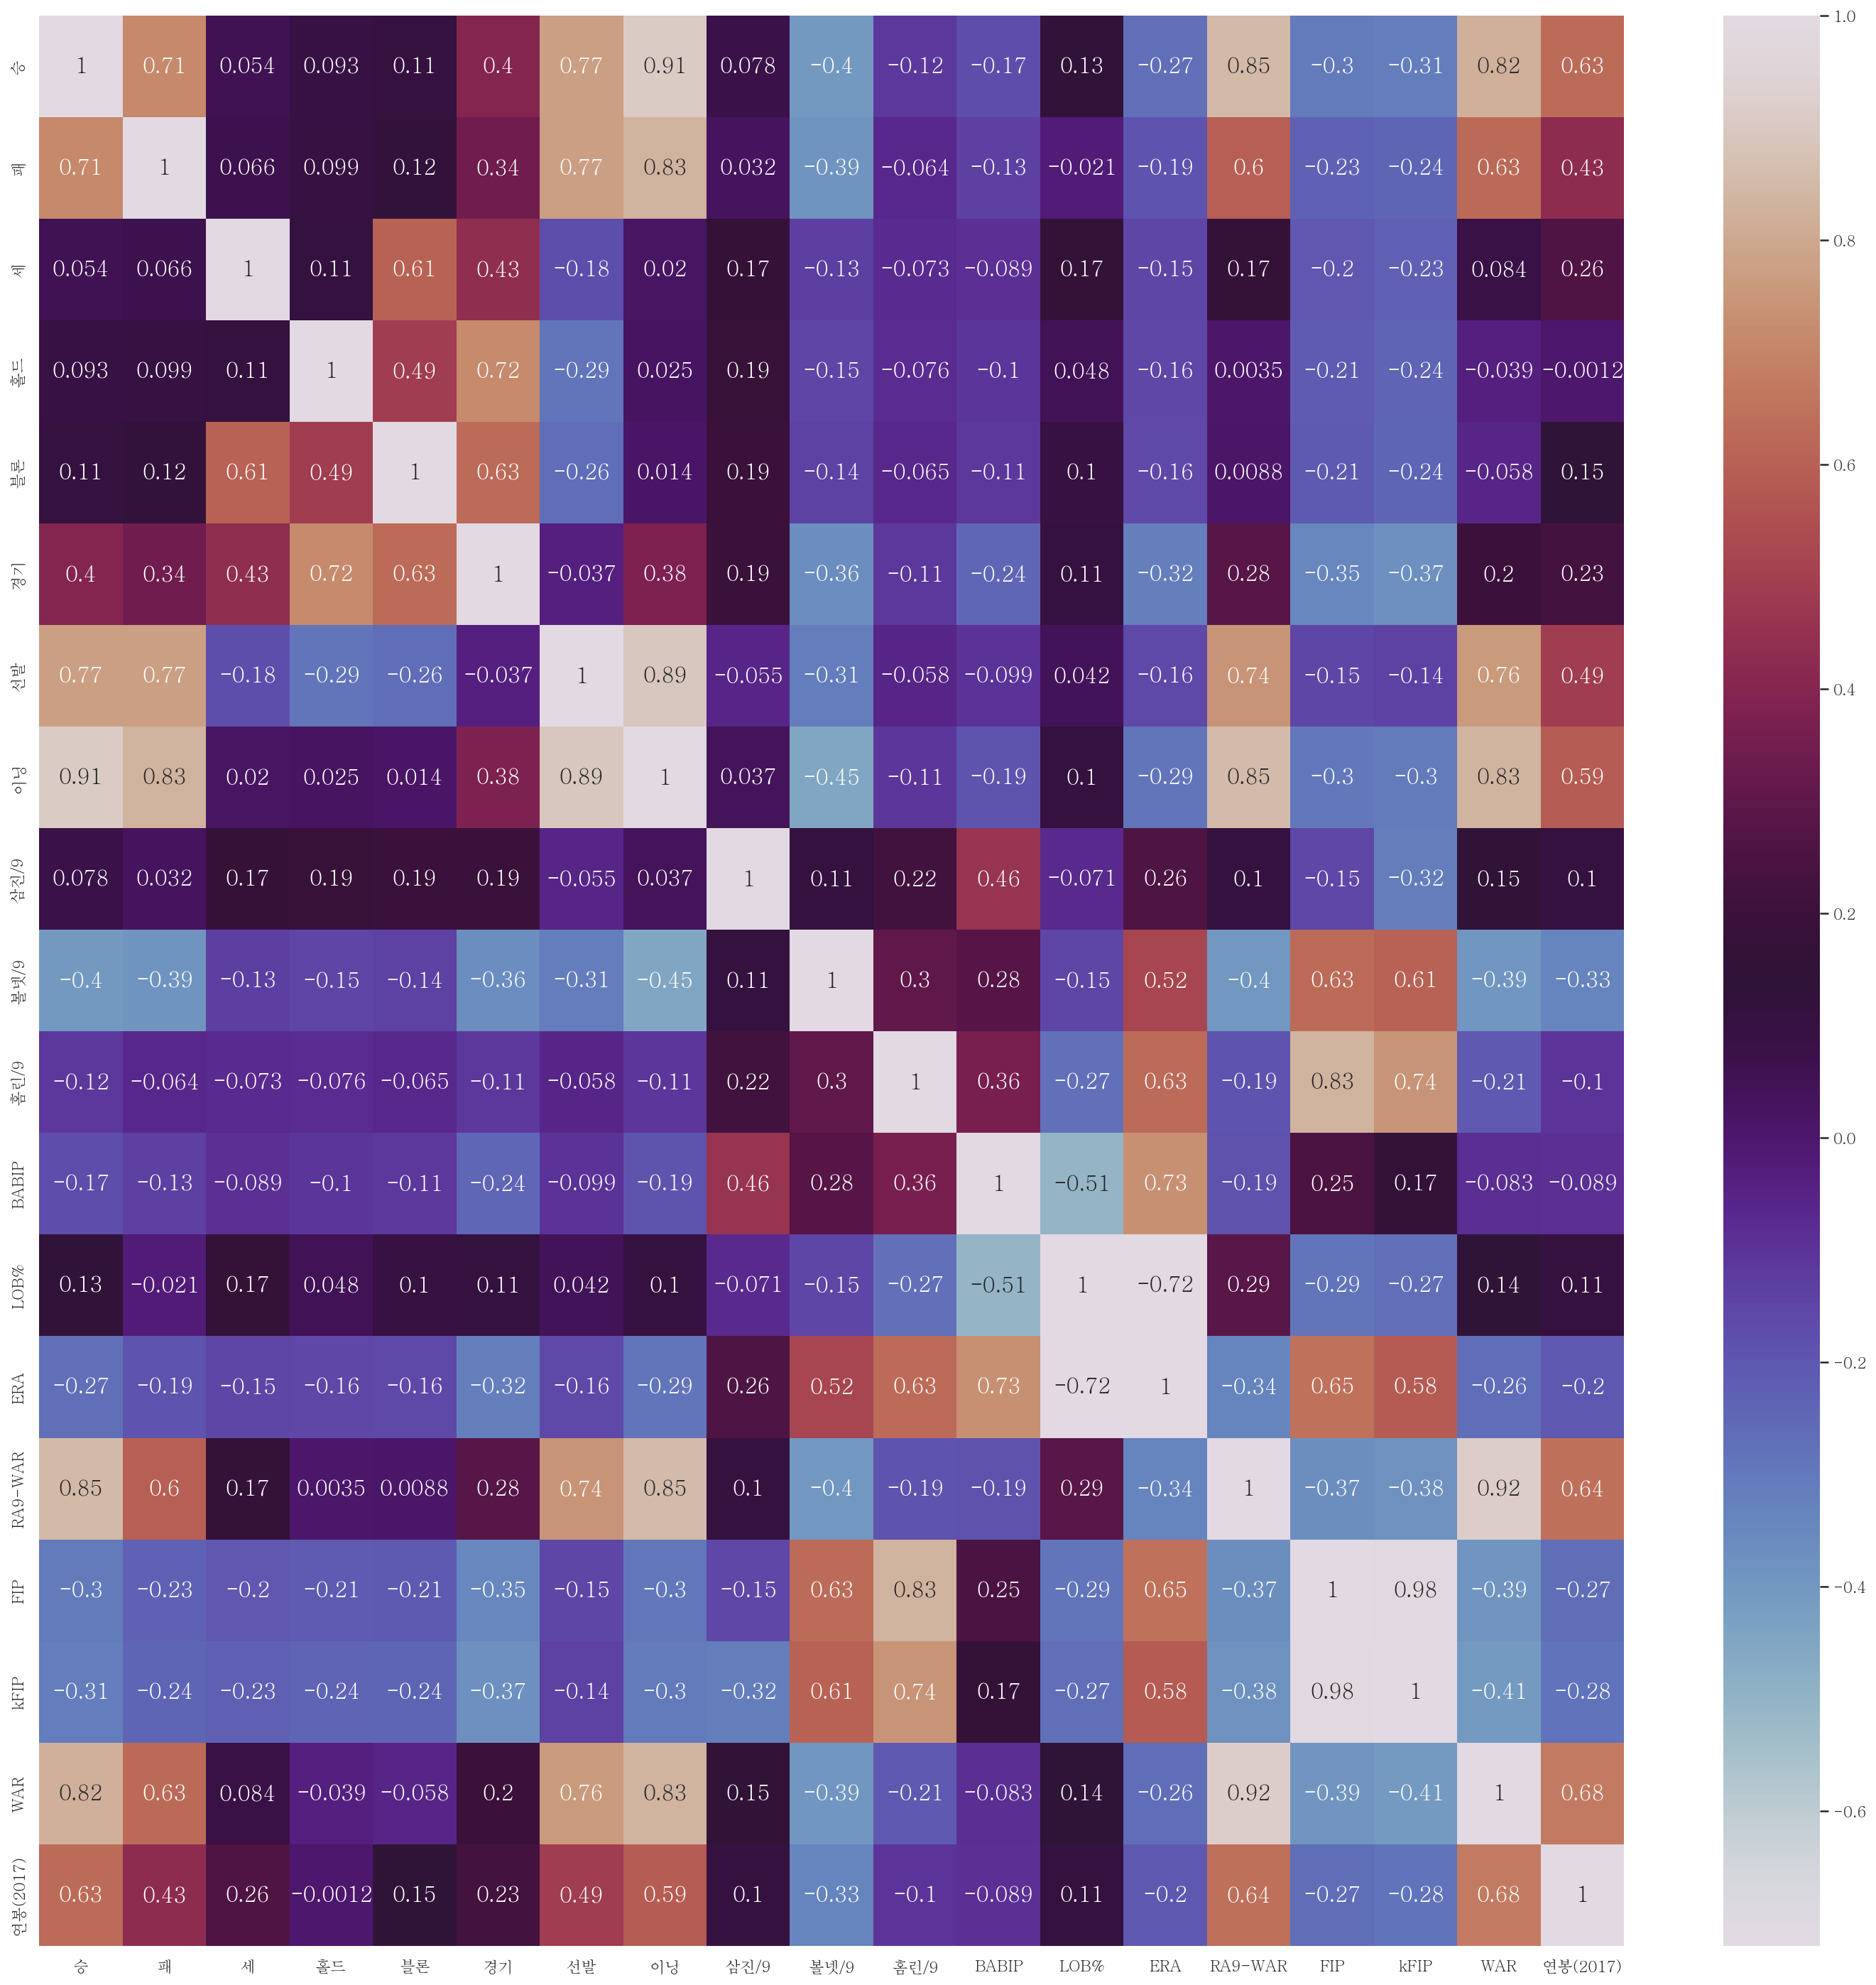

In [76]:
corr = picher_df[scale_columns].corr(method='pearson')
sns.heatmap(corr, annot=True,annot_kws={'size':15}, cmap='twilight')
plt.rc('figure', figsize=(25,25))
plt.show()

### 회귀분석의 성능 향상을 위한 다중공선성 확인
- 일반적으로 10 이상이면 다중공선성이 있었다고 봄
 - 10이상이라 해서 무조건 뺴지는 않음


In [77]:
# 분산 팽창 요인(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처들의 vif 계수 확인
vif = pd.DataFrame() # 빈 df 생성
vif['VIF_factor'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
## 리스트 내포 (X는 독립변수들을 가지고 있음, 위에 정의 함)
vif['features'] = X.columns
vif.round(1)

,VIF_factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


### 적절한 피처를 이용하여 다시 모델 학습
- 팽창계수가 10이 넘어가더라도 영향력에 따라 적절한 피처들을 판단함.

In [78]:
# 변수 재 설정
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '선발', '연봉(2017)']]
y = picher_df['y']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=109)
# 선형
lr = LinearRegression() # estimator
model = lr.fit(X_train, y_train)
pred = model.predict(X_test)
# 평가함수 호출
evaluate_rger(y_test, pred)

MAE: 3728.476, RMSE: 6927.506


In [81]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9164969947998372
0.9229821166454467


In [ ]:
# 과소 적합 교차검증, grid_search또는 이상치 제거
# 회귀 트리, 앙상블, 등등의 방안으로..


In [82]:
# 피처들의 vif 계수 확인
vif = pd.DataFrame() # 빈 df 생성
vif['VIF_factor'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
## 리스트 내포 (X는 독립변수들을 가지고 있음, 위에 정의 함)
vif['features'] = X.columns
vif.round(1)

,VIF_factor,features
0,2.0,FIP
1,4.1,WAR
2,2.0,볼넷/9
3,1.2,삼진/9
4,2.7,선발
5,1.9,연봉(2017)


- 다중공선성 문제는 해결됨
<br><br>

### 예상 연봉과 실제 연봉 비교

In [83]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [84]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '선발', '연봉(2017)']]
pred_2018 = model.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(pred_2018)

In [95]:
picher_df['예측연봉(2018)'].isnull().value_counts()

False    152
Name: 예측연봉(2018), dtype: int64

### 최종 예측결과 추출

In [101]:
## 선수명, 실제(2018연봉), 예측연봉, 작년연봉
# 원본 데이터 다시 로딩
again_p = pd.read_csv('C:/k_digital/Sourcce/data/batter_stats_2017.csv')
again_p = again_p[['선수명', '연봉(2017)']]


In [97]:

# 추가할 컬럼 정리
pred = np.round(pd.Series(pred_2018),2)

# 2018 예측 정보 합치기
again_p.insert(2,'예측연봉(2018)',pred)
again_p.tail(20)

,선수명,연봉(2018),예측연봉(2018),연봉(2017)
171,윤병호,3500,NaN,3000
172,주효상,3500,NaN,3000
173,김사훈,4000,NaN,2900
174,김강민,60000,NaN,60000
175,김동욱,4000,NaN,3100
176,신성현,5700,NaN,5700
177,박기혁,15000,NaN,15000
178,김재현,5000,NaN,5300
179,하준호,5700,NaN,5200
180,박승욱,4500,NaN,3500


In [109]:
result_df = picher_df.sort_values(by = ['y'], ascending = False)
result_df.drop(['연봉(2017)'], axis = 1, inplace = True, errors ='ignore')
result_df = result_df.merge(picher_df, on=['선수명'], how='left')

result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns= ['선수명', '실제연봉(2018)', '예측연봉(2018)','작년연봉(2017)']
result_df.head()

KeyError: "['y', '예측연봉(2018)'] not in index"

In [99]:
result_df.tail()

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
147,장지훈,2800,-2207.498463,-0.551186
148,차재용,2800,-413.828535,-0.547193
149,성영훈,2700,5011.692609,-0.551186
150,정동윤,2700,3662.968999,-0.551186
151,장민익,2700,2523.621924,-0.551186


In [106]:
# 2017과 2018에 연봉 변화가 있는 선수만을 대상으로 추출
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
# 인덱스 정리
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df

,level_0,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,0,양현종,230000,174471.557690,NaN
1,1,1,켈리,140000,122288.627873,NaN
2,2,2,소사,120000,86243.253367,NaN
3,3,3,정우람,120000,121517.253641,NaN
4,4,4,레일리,111000,105229.874915,NaN
5,5,5,차우찬,100000,121119.896146,NaN
6,6,6,장원준,100000,115323.832468,NaN
7,7,7,피어밴드,85000,56557.090442,NaN
8,8,8,윤성환,80000,90672.711016,NaN
9,9,9,우규민,70000,75016.625343,NaN


<AxesSubplot:xlabel='선수명'>

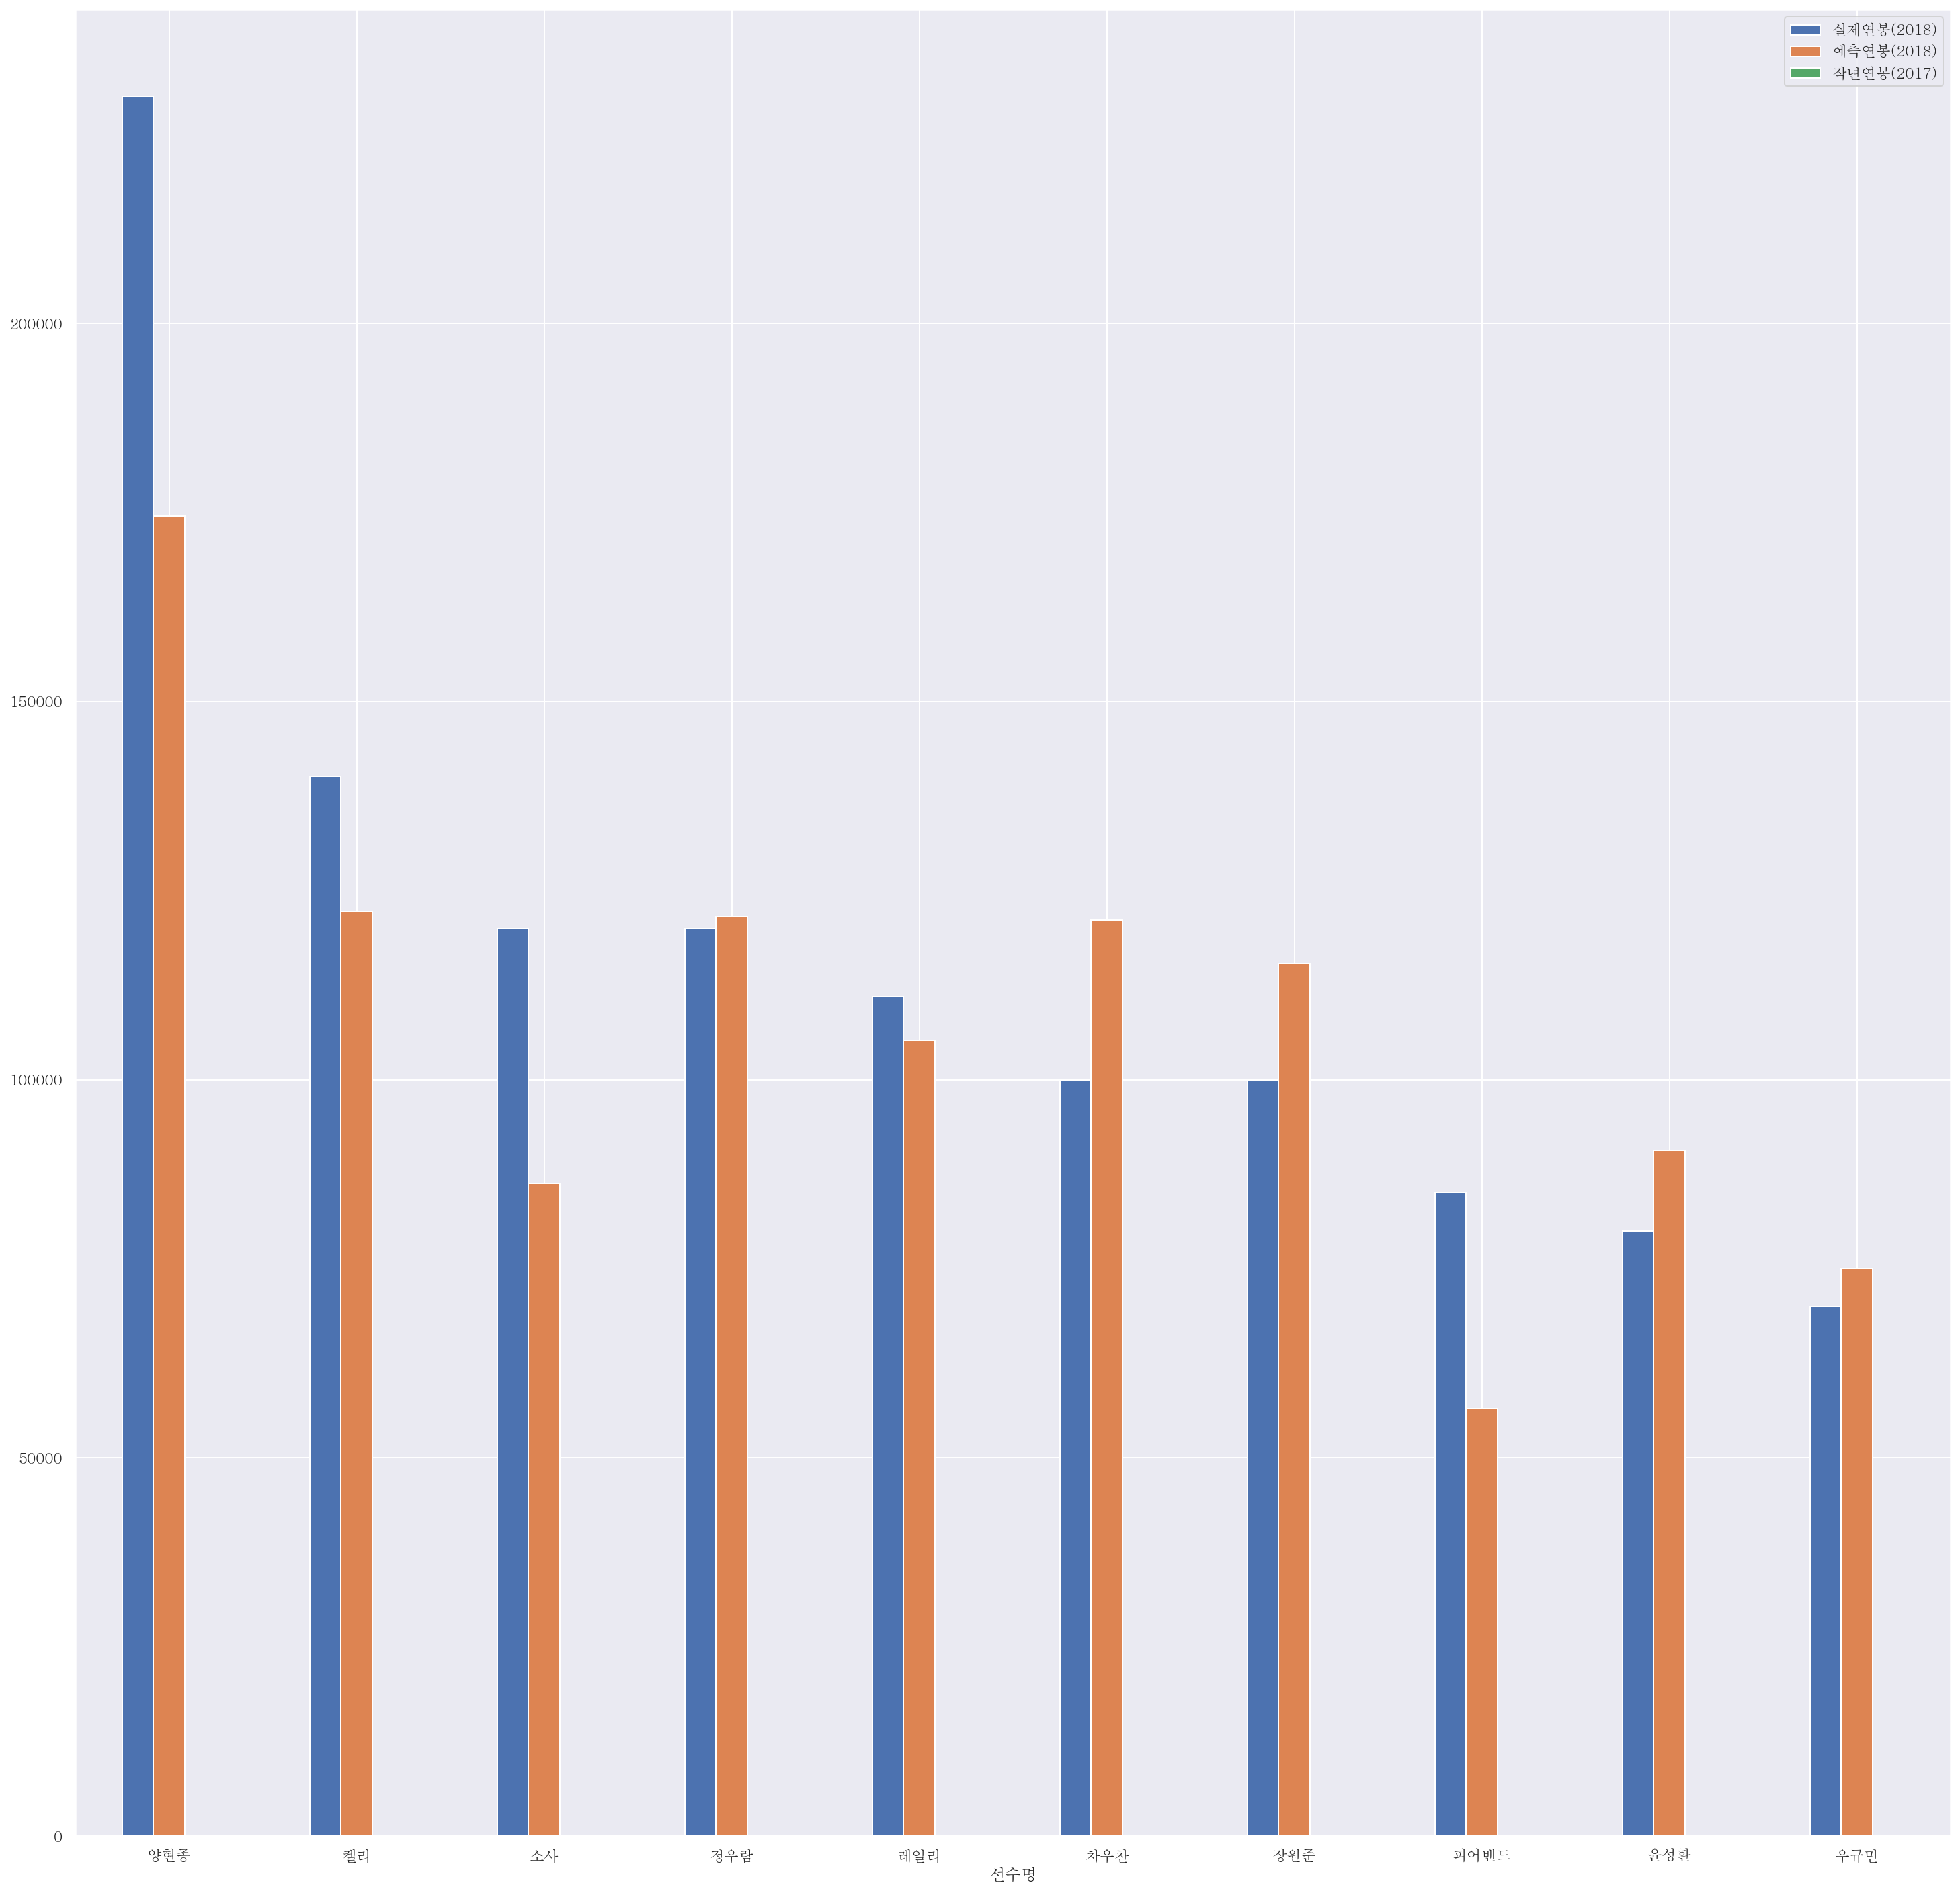

In [107]:
result_df.plot(x='선수명', y =['실제연봉(2018)', '예측연봉(2018)','작년연봉(2017)'], kind='bar',
               rot=0)
               